In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv("../data/extracted_data.csv")
df.head()

,title,channelTitle,categoryId,tags,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,1958,1,1
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,566,1,1
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,4918,3,1
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,5088,1,1
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,4004,1,1


In [39]:
columns_to_delete = ['title', 'channelTitle', 'tags']

for column in columns_to_delete : 
    df.drop(column, axis='columns', inplace=True)
    
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,22,1514614,156908,5855,35313,1958,1,1
1,20,2381688,146739,2794,16549,566,1,1
2,24,2038853,353787,2628,40221,4918,3,1
3,10,496771,23251,1856,7647,5088,1,1
4,26,1123889,45802,964,2196,4004,1,1


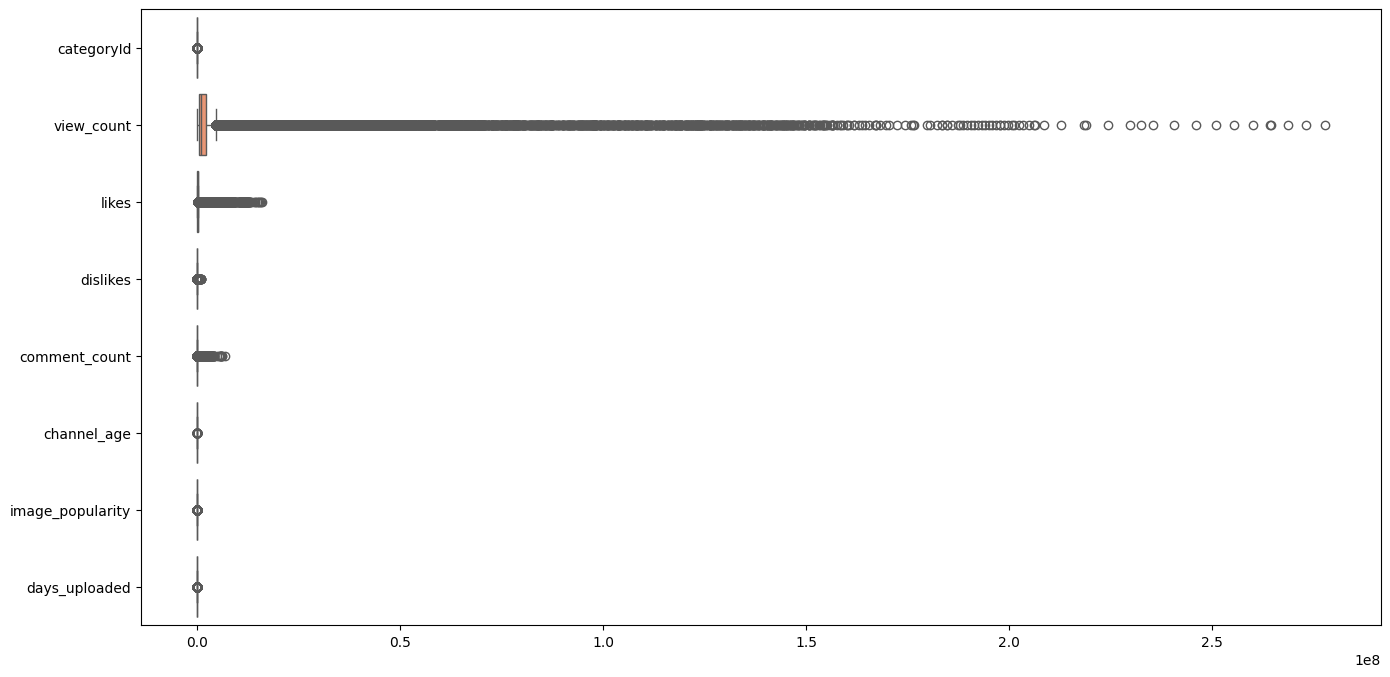

In [7]:
#detekcija autlajera
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")


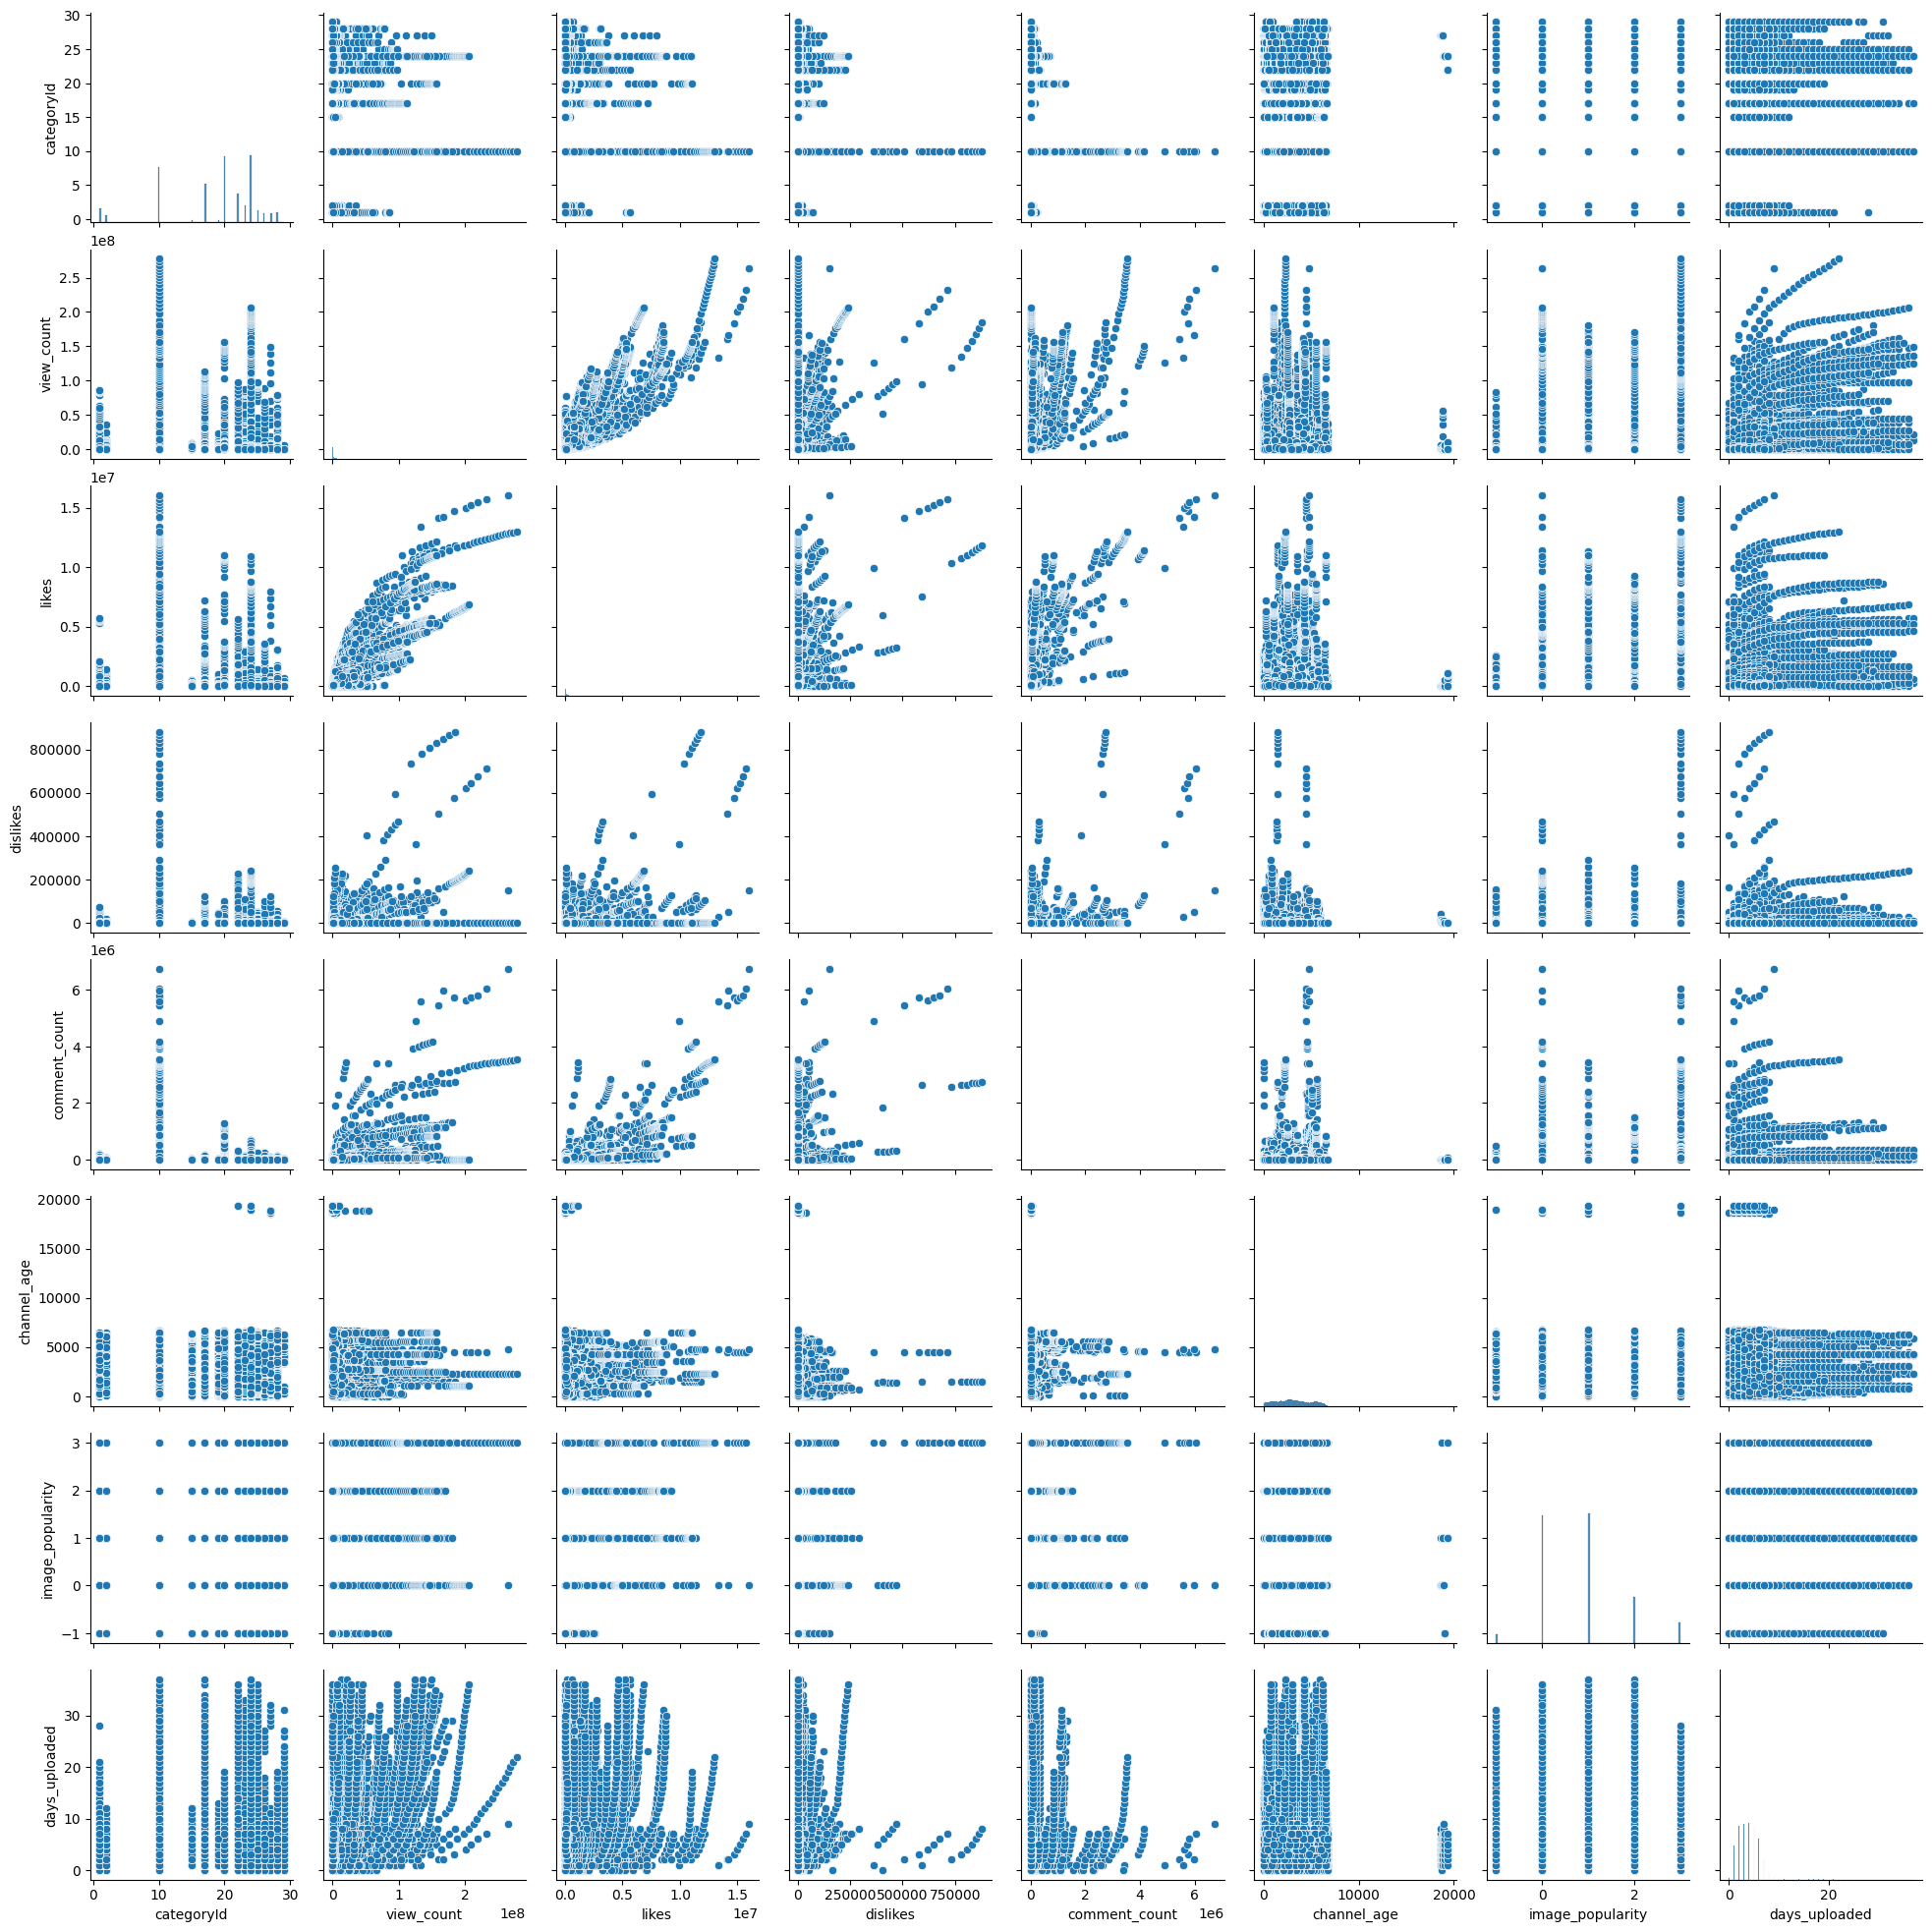

In [8]:
sns.pairplot(df)


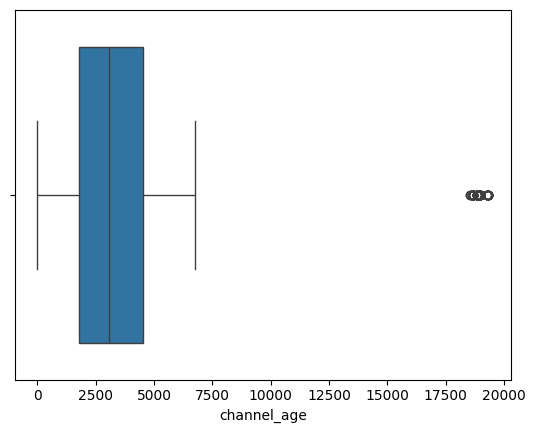

In [9]:
sns.boxplot(x=df['channel_age'])
df = df.sort_values('channel_age',ascending=True)
df = df[df['channel_age']<17500]


In [40]:
#broj nedostajućih vrednosti po kolonama
view_count_mean = df['view_count'].mean()
df["view_count"] = df["view_count"].replace(0,view_count_mean)


In [41]:
likes_mean = df['likes'].mean()
df["likes"] = df["likes"].replace(0,likes_mean)


In [42]:

percent_of_views = df['dislikes'] / df['view_count'].where(df['dislikes'] > 0, 1)
percent_of_likes = df['dislikes'] / df['likes'].where(df['dislikes'] > 0, 1)
      
mean_value_of_percent_from_views = sum(percent_of_views) / len(percent_of_views)
mean_value_of_percent_from_likes = sum(percent_of_likes) / len(percent_of_likes)

df['dislikes'] = df.apply(lambda row: (row['view_count']*mean_value_of_percent_from_views if row['view_count']*mean_value_of_percent_from_views < row['likes']*mean_value_of_percent_from_likes else row['likes']*mean_value_of_percent_from_likes if row['dislikes'] == 0 else row['dislikes']), axis=1)


In [43]:
def categorize_image(row):
    likes_to_view_percent = row['likes'] * 100 / row['view_count']
    if likes_to_view_percent < 2:
        return int(2)
    
    if likes_to_view_percent >= 2 and likes_to_view_percent < 5:
        return int(1)
    
    if likes_to_view_percent >= 5 and likes_to_view_percent < 10:
        return int(0)
    
    if likes_to_view_percent >= 10:
        return int(3)

In [45]:
df['image_popularity'] = df.apply(lambda row: categorize_image(row) if row['image_popularity'] == -1 else int(row['image_popularity']), axis=1)
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,22,1514614.0,156908.0,696.438236,35313,1958,1,1
1,20,2381688.0,146739.0,1095.129578,16549,566,1,1
2,24,2038853.0,353787.0,937.489807,40221,4918,3,1
3,10,496771.0,23251.0,228.421445,7647,5088,1,1
4,26,1123889.0,45802.0,516.778052,2196,4004,1,1


In [49]:
#duplikati
df.nunique()


categoryId              15
view_count          234651
likes               130808
dislikes            207176
comment_count        34423
channel_age           6754
image_popularity         4
days_uploaded           38
dtype: int64

In [50]:
duplicate_all = df.loc[df.duplicated(keep=False).values]

duplicate_all


,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
3499,22,162958.0,16013.00000,74.930102,1098,61,0,3
3500,22,162958.0,16013.00000,74.930102,1098,61,0,3
38214,20,116363.0,131122.74208,53.505146,0,4980,0,1
38227,17,609686.0,8446.00000,225.000000,1347,566,2,3
38233,17,1310805.0,6243.00000,998.000000,1985,2238,2,3
...,...,...,...,...,...,...,...,...
38845,27,448881.0,18965.00000,206.401032,1386,4033,1,2
38846,24,463373.0,27957.00000,213.064632,2072,2577,1,3
38848,23,3361953.0,296359.00000,1545.867540,28468,2409,0,4
38849,22,1688785.0,55264.00000,776.524215,2075,186,1,4


In [51]:
df = df.drop_duplicates()
df


,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,22,1514614.0,156908.0,696.438236,35313,1958,1,1
1,20,2381688.0,146739.0,1095.129578,16549,566,1,1
2,24,2038853.0,353787.0,937.489807,40221,4918,3,1
3,10,496771.0,23251.0,228.421445,7647,5088,1,1
4,26,1123889.0,45802.0,516.778052,2196,4004,1,1
...,...,...,...,...,...,...,...,...
245982,23,563422.0,68917.0,259.068399,1822,3634,1,7
245983,20,2440589.0,114121.0,1122.212985,5828,2833,1,7
245984,17,474333.0,5730.0,91.672717,343,2027,2,6
245985,24,804338.0,29540.0,369.844553,1972,6764,1,6


In [52]:
df.to_csv('../data/preprocessed_data.csv', index=False)